## HadUK Grid ##

Loading HadUK grid temperature obs for fidelity testing against over UK landmass.

NOTE: tas not available at daily timescale - only at Monthly timescale

In [1]:
# Local imports
import os
import sys
import time
import argparse
import calendar

# Third-party imports
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import shapely.geometry
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import iris

# Specific imports
from tqdm import tqdm
from datetime import datetime, timedelta

# Load my specific functions
sys.path.append("/home/users/benhutch/unseen_functions")
from functions import create_masked_matrix

/home/users/benhutch/.conda/envs/bens-conda-env2/lib/python3.11/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


In [2]:
# Set up the directory in which the 1km monthly data is stored
data_dir = "/badc/ukmo-hadobs/data/insitu/MOHC/HadOBS/HadUK-Grid/v1.1.0.0/60km/tas/mon/v20220310/"

# Set up ythe test file
test_file_year = 1960

# Set up the path
test_file_path = os.path.join(
    data_dir,
    f"tas_hadukgrid_uk_60km_mon_{test_file_year}01-{test_file_year}12.nc",
)

# assert that the file exists
assert os.path.exists(test_file_path), f"File {test_file_path} does not exist"

# Load the data with iris
cube = iris.load_cube(test_file_path, "tas")

In [3]:
cube

Air Temperature (degC),time,projection_y_coordinate,projection_x_coordinate
Shape,12,23,17
Dimension coordinates,,,
time,x,-,-
projection_y_coordinate,-,x,-
projection_x_coordinate,-,-,x
Auxiliary coordinates,,,
month_number,x,-,-
season_year,x,-,-
latitude,-,x,x
longitude,-,x,x


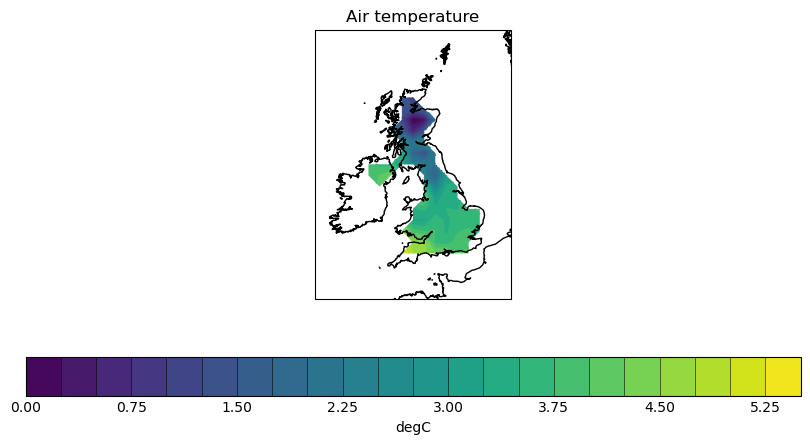

In [4]:
import iris.quickplot as qplt

fig = plt.figure(figsize=(10, 5))
qplt.contourf(cube[0, :, :], 25)
plt.gca().coastlines()

In [5]:
cube_values = cube.data

In [6]:
cube_values[0, :, :]

masked_array(
  data=[[--, --, --, --, --, --, --, --, --, --, --, --, --, --, --, --,
         --],
        [--, --, --, --, --, --, --, --, --, --, --, --, --, --, --, --,
         --],
        [--, --, --, --, --, --, --, --, --, --, --, --, --, --, --, --,
         --],
        [--, --, --, --, --, --, --, 5.352228274635639,
         4.782228550079969, 4.53247590106165, 4.303881371441673,
         4.498546081664018, 4.0111958770991025, 4.1580028932324815, --,
         --, --],
        [--, --, --, --, --, --, --, --, 4.530978718661318,
         4.658625058138116, 3.723986144520248, 3.5906003399240634,
         3.9175755766172595, 3.8379033503553424, --, --, --],
        [--, --, --, --, --, --, --, 4.696540437955327,
         3.925461946016784, 3.7468518138520475, 3.7555268183683386,
         3.4625166610270433, 3.7223763605705718, 3.8336573408194714,
         3.68717628825147, --, --],
        [--, --, --, --, --, --, --, --, 3.2295322637023602,
         3.216174688527956, 3.73125

In [7]:
cube.coord("latitude").points

masked_array(
  data=[[48.78959642, 48.8454706 , 48.89568464, 48.94019972, 48.97898122,
         49.01199888, 49.03922684, 49.0606437 , 49.07623258, 49.0859812 ,
         49.08988185, 49.08793144, 49.08013152, 49.06648825, 49.0470124 ,
         49.02171932, 48.99062891],
        [49.32363884, 49.38056929, 49.43173466, 49.47709474, 49.51661366,
         49.55026008, 49.57800717, 49.59983278, 49.61571942, 49.62565434,
         49.62962955, 49.62764185, 49.61969285, 49.60578894, 49.58594128,
         49.56016578, 49.52848305],
        [49.85750609, 49.91551558, 49.96765293, 50.01387643, 50.05414894,
         50.08843793, 50.11671563, 50.13895904, 50.15515003, 50.16527538,
         50.16932681, 50.167301  , 50.15919962, 50.14502928, 50.12480157,
         50.09853299, 50.06624491],
        [50.39119312, 50.45030539, 50.5034362 , 50.55054233, 50.59158524,
         50.62653123, 50.65535146, 50.6780221 , 50.69452433, 50.70484442,
         50.7089738 , 50.70690902, 50.69865179, 50.684209  , 50.

In [8]:
# # create a masked matrix
MASK_MATRIX = create_masked_matrix(
    country="United Kingdom",
    cube=cube,
)

Found Country United Kingdom


In [9]:
model_data = cube[:, :, :].data

model_values = model_data * MASK_MATRIX

In [10]:
np.min(model_values)

np.float64(-1.4659332919812653)

In [11]:
np.max(model_values)

np.float64(16.053312052862076)

In [12]:
model_values

masked_array(
  data=[[[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --]],

        [[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --]],

        [[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --]],

        ...,

        [[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --,

In [13]:
# where the mask is 0, set the model values to nan
model_values_masked = np.where(MASK_MATRIX == 0, np.nan, model_values)

In [14]:
# any values greater than 1e18, set to nan
model_values_masked = np.where(model_values_masked > 1e18, np.nan, model_values_masked)

In [15]:
model_values_masked

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan

TypeError: Dimensions of C (12, 23, 17) should be one smaller than X(17) and Y(23) while using shading='flat' see help(pcolormesh)

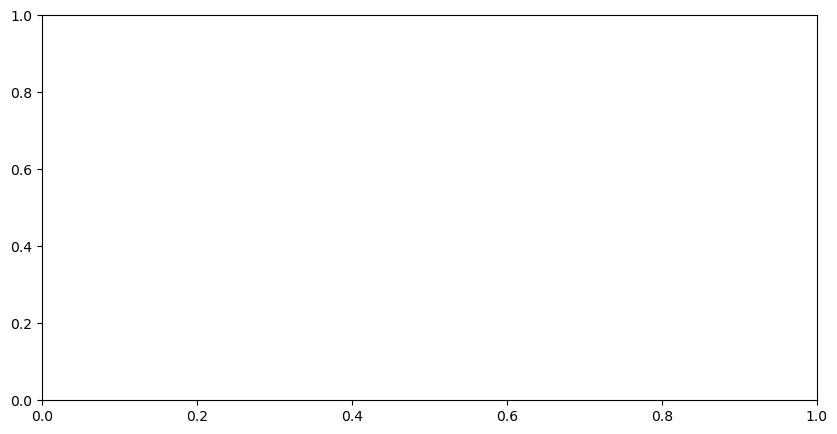

In [16]:
# plot the masked model values
data_this = model_values[:, :]
lons=cube.coord('longitude').points
lats=cube.coord('latitude').points

plt.figure(figsize=(10, 5))
plt.pcolormesh(lons, lats, data_this, shading='auto')
plt.colorbar()
# plt.gca().coastlines()

/tmp/ipykernel_73046/1542901323.py:7: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(lons, lats, data_this, shading='auto')


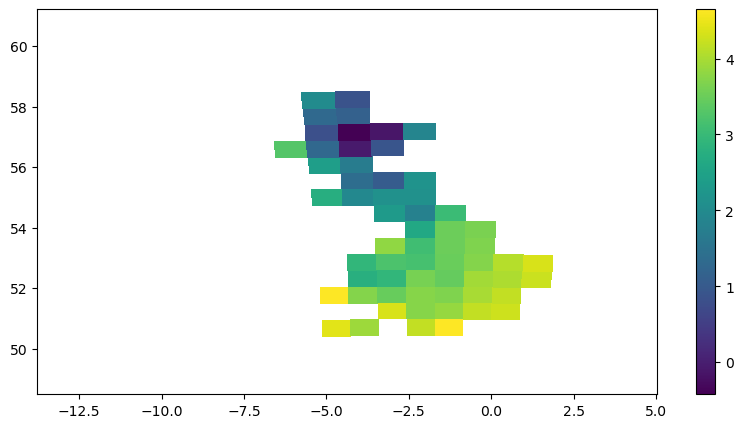

In [17]:
# plot the masked model values
data_this = model_values_masked[11, :, :]
lons=cube.coord('longitude').points
lats=cube.coord('latitude').points

plt.figure(figsize=(10, 5))
plt.pcolormesh(lons, lats, data_this, shading='auto')
plt.colorbar()
# plt.gca().coastlines()

In [31]:
sys.path.append("/home/users/benhutch/unseen_functions")
from functions import load_model_data_xarray

In [32]:
# Load in an example model file
model_ds = load_model_data_xarray(
    model_variable="tas",
    model="HadGEM3-GC31-MM",
    experiment="dcppA-hindcast",
    start_year=1960,
    end_year=1960,
    first_fcst_year=1960,
    last_fcst_year=1960,
    months=[12, 1, 2],
    member="r1i1p1f2",
    frequency="Amon",
    parallel=False,
)

Model path: /gws/nopw/j04/canari/users/benhutch/dcppA-hindcast/data/tas/HadGEM3-GC31-MM/merged_files
The model path root is gws
Number of unique variant labels: 10
For model: HadGEM3-GC31-MM
First 10 unique variant labels: ['r10i1p1f2' 'r1i1p1f2' 'r2i1p1f2' 'r3i1p1f2' 'r4i1p1f2' 'r5i1p1f2'
 'r6i1p1f2' 'r7i1p1f2' 'r8i1p1f2' 'r9i1p1f2']
Number of unique variant labels: 10
Unique variant labels: ['r10i1p1f2' 'r1i1p1f2' 'r2i1p1f2' 'r3i1p1f2' 'r4i1p1f2' 'r5i1p1f2'
 'r6i1p1f2' 'r7i1p1f2' 'r8i1p1f2' 'r9i1p1f2']
First 10 model files: ['tas_Amon_HadGEM3-GC31-MM_dcppA-hindcast_s1960-r10i1p1f2_gn_196011-197103.nc', 'tas_Amon_HadGEM3-GC31-MM_dcppA-hindcast_s1960-r1i1p1f2_gn_196011-197103.nc', 'tas_Amon_HadGEM3-GC31-MM_dcppA-hindcast_s1960-r2i1p1f2_gn_196011-197103.nc', 'tas_Amon_HadGEM3-GC31-MM_dcppA-hindcast_s1960-r3i1p1f2_gn_196011-197103.nc', 'tas_Amon_HadGEM3-GC31-MM_dcppA-hindcast_s1960-r4i1p1f2_gn_196011-197103.nc', 'tas_Amon_HadGEM3-GC31-MM_dcppA-hindcast_s1960-r5i1p1f2_gn_196011-197103.nc'

Processing init years:   0%|          | 0/1 [00:00<?, ?it/s]

Processing init years: 100%|██████████| 1/1 [00:00<00:00, 10.28it/s]


In [33]:
model_cube = model_ds["tas"].squeeze().to_iris()
obs_cube = cube

In [34]:
# extract the model cube data
MASK_MATRIX_MODEL_CUBE = create_masked_matrix(
    country="United Kingdom",
    cube=model_cube,
)

Found Country United Kingdom


In [35]:
# apply the mask to the model data
model_data = model_cube[:, :, :].data

In [36]:
# apply the mask to the model data
model_values = model_data * MASK_MATRIX_MODEL_CUBE

In [37]:
np.min(model_values)

np.float64(0.0)

In [38]:
np.max(model_values)

np.float64(284.13232421875)

In [39]:
# any points which are 0 in the mask, set to nan
model_values_masked = np.where(MASK_MATRIX_MODEL_CUBE == 0, np.nan, model_values)

In [40]:
# any values greater than 1e18, set to nan
model_values_masked = np.where(model_values_masked > 1e18, np.nan, model_values_masked)

In [48]:
model_values_masked.shape

(125, 324, 432)

(50.0, 60.0)

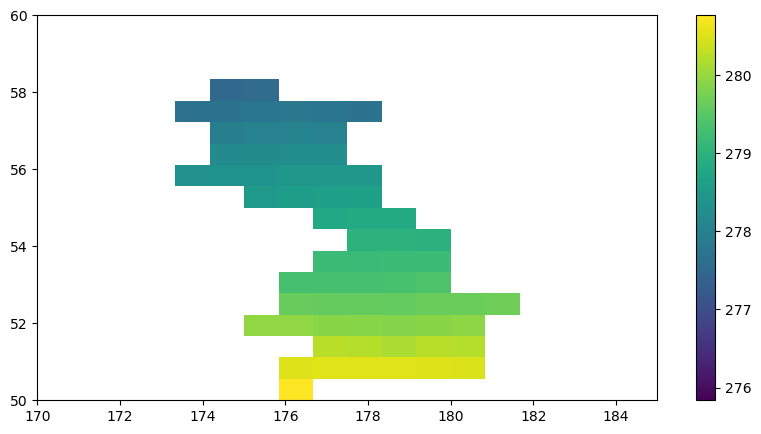

In [57]:
# plot the masked model values
data_this = model_values_masked[11, :, :]
lons=model_cube.coord('longitude').points
lats=model_cube.coord('latitude').points


# set the extent of the plot
extent = [170, 185, 50, 60]

fig = plt.figure(figsize=(10, 5))
# ax = plt.axes(projection=ccrs.PlateCarree())
plt.pcolormesh(lons, lats, data_this, shading='auto')
plt.colorbar()
# plt.gca().coastlines()

# Set the extent of the plot
# set x and y limits
plt.xlim(extent[:2])
plt.ylim(extent[2:])

In [96]:
proj_x = obs_cube.coord("projection_x_coordinate").points
proj_y = obs_cube.coord("projection_y_coordinate").points

In [97]:
proj_x.shape

(900,)

In [98]:
proj_y.shape

(1450,)

In [99]:
xx, yy = np.meshgrid(proj_x, proj_y)

In [100]:
cs_nat = obs_cube.coord_system()

In [101]:
cs_nat

TransverseMercator(latitude_of_projection_origin=49.0, longitude_of_central_meridian=-2.0, false_easting=400000.0, false_northing=-100000.0, scale_factor_at_central_meridian=0.9996012717, ellipsoid=GeogCS(semi_major_axis=6377563.396, semi_minor_axis=6356256.909))

In [102]:
cs_nat_cart = cs_nat.as_cartopy_projection()

In [103]:
cs_nat_cart

<Projected CRS: +proj=tmerc +a=6377563.396 +b=6356256.909 +lon_0=- ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Transverse Mercator
Datum: unknown
- Ellipsoid: unknown
- Prime Meridian: Greenwich

In [104]:
# Create the target projection
cs_tgt = model_cube.coord_system()

In [109]:
cs_tgt = iris.coord_systems.GeogCS(iris.analysis.cartography.DEFAULT_SPHERICAL_EARTH_RADIUS)

In [110]:
# Create the target projection
cs_tgt_cart = cs_tgt.as_cartopy_projection()

In [111]:
lons, lats, _ = cs_tgt_cart.transform_points(cs_nat_cart, xx, yy).T

In [114]:
np.shape(lons)

(900, 1450)

In [115]:
lats.shape

(900, 1450)

In [117]:
model_lats.shape

(324, 432)

In [118]:
# create a new cube with the new lons and lats
obs_cube_new = obs_cube.copy(data=obs_cube.data, lats=lats, lons=lons)

TypeError: Cube.copy() got an unexpected keyword argument 'lats'

In [80]:
import iris
import iris.analysis.cartography

# Reproject the source cube to a latitude-longitude grid
source_cube_ll = iris.analysis.cartography.project(obs_cube, model_cube.coord('latitude'), model_cube.coord('longitude'))


/home/users/benhutch/.conda/envs/bens-conda-env2/lib/python3.11/site-packages/iris/analysis/cartography.py:702: IrisDefaultingWarning: Coordinate system of latitude and longitude coordinates is not specified. Assuming WGS84 Geodetic.
  warnings.warn(


AttributeError: 'DimCoord' object has no attribute 'x_limits'

In [81]:
from iris.experimental.regrid import regrid_rectilinear_to_rectilinear

regridded_cube = regrid_rectilinear_to_rectilinear(obs_cube, model_cube, iris.analysis.Linear())


/home/users/benhutch/.conda/envs/bens-conda-env2/lib/python3.11/site-packages/iris/experimental/regrid.py:51: IrisDeprecation: The 'iris.experimental.regrid' package is deprecated since version 3.2, and will be removed in a future release.  The PointInCell class has now moved into iris.analysis.  All its other content will be withdrawn.  If you still use any of this, please contact the Iris Developers to discuss how to replace it or to retain it (reverse the deprecation).
  warn_deprecated(wmsg)


ImportError: cannot import name 'regrid_rectilinear_to_rectilinear' from 'iris.experimental.regrid' (/home/users/benhutch/.conda/envs/bens-conda-env2/lib/python3.11/site-packages/iris/experimental/regrid.py)

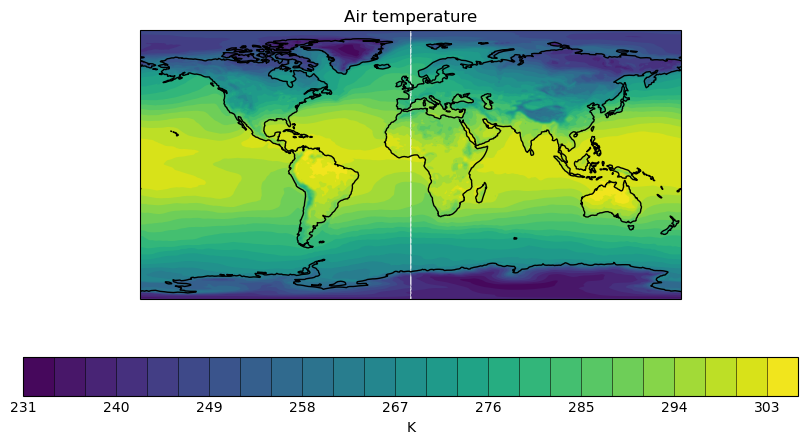

In [9]:
# Plot the model data
fig = plt.figure(figsize=(10, 5))
qplt.contourf(model_cube[0, :, :], 25)
plt.gca().coastlines()

In [10]:
np.shape(obs_cube.coord("latitude").points)

(1450, 900)

In [ ]:
coor

In [11]:
proj_x_haduk = obs_cube.coord("projection_x_coordinate").points
proj_y_haduk = obs_cube.coord("projection_y_coordinate").points

In [12]:
# Make 2d arrays of the projection coordinates
xx, yy = np.meshgrid(proj_x_haduk, proj_y_haduk)

In [21]:
xx

array([[-199500., -198500., -197500., ...,  697500.,  698500.,  699500.],
       [-199500., -198500., -197500., ...,  697500.,  698500.,  699500.],
       [-199500., -198500., -197500., ...,  697500.,  698500.,  699500.],
       ...,
       [-199500., -198500., -197500., ...,  697500.,  698500.,  699500.],
       [-199500., -198500., -197500., ...,  697500.,  698500.,  699500.],
       [-199500., -198500., -197500., ...,  697500.,  698500.,  699500.]])

In [13]:
# Extract native projection and conver to cartopuy projection
cs_nat = obs_cube.coord_system()
cs_nat_cart = cs_nat.as_cartopy_projection()

In [14]:
# Create the target projection
target_proj = cube.coord_system().as_cartopy_projection()

In [27]:
# Set the coord system
print(obs_cube[0].coord_system())

TransverseMercator(latitude_of_projection_origin=49.0, longitude_of_central_meridian=-2.0, false_easting=400000.0, false_northing=-100000.0, scale_factor_at_central_meridian=0.9996012717, ellipsoid=GeogCS(semi_major_axis=6377563.396, semi_minor_axis=6356256.909))


In [28]:
model_cube.coord_system = obs_cube.coord_system()

In [29]:
print(model_cube[0].coord_system())

None


In [15]:
# Convcert cartopy transform method to transform the native to the target projection
# lons, lats, _ = target_proj.transform_points(cs_nat_cart, xx, yy).T

In [16]:
lons

array([[-199500., -199500., -199500., ..., -199500., -199500., -199500.],
       [-198500., -198500., -198500., ..., -198500., -198500., -198500.],
       [-197500., -197500., -197500., ..., -197500., -197500., -197500.],
       ...,
       [ 697500.,  697500.,  697500., ...,  697500.,  697500.,  697500.],
       [ 698500.,  698500.,  698500., ...,  698500.,  698500.,  698500.],
       [ 699500.,  699500.,  699500., ...,  699500.,  699500.,  699500.]])

In [32]:
from iris.analysis import cartography

# Specifyt the projection
target_proj = model_cube.coord_system().as_cartopy_projection()

TypeError: 'TransverseMercator' object is not callable

In [31]:
target_proj

<Projected CRS: +proj=tmerc +a=6377563.396 +b=6356256.909 +lon_0=- ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Transverse Mercator
Datum: unknown
- Ellipsoid: unknown
- Prime Meridian: Greenwich

In [19]:
# regrid the obs data to the model grid
obs_cube_rg = obs_cube.regrid(
    model_cube, iris.analysis.Linear(extrapolation_mode="mask")
)

ValueError: The rectilinear grid coordinates of the given cube and target grid must either both have coordinate systems or both have no coordinate system but with matching coordinate metadata.

In [18]:
obs_cube_rg

<iris 'Cube' of air_temperature / (degC) (time: 12; projection_y_coordinate: 1450; projection_x_coordinate: 900)>

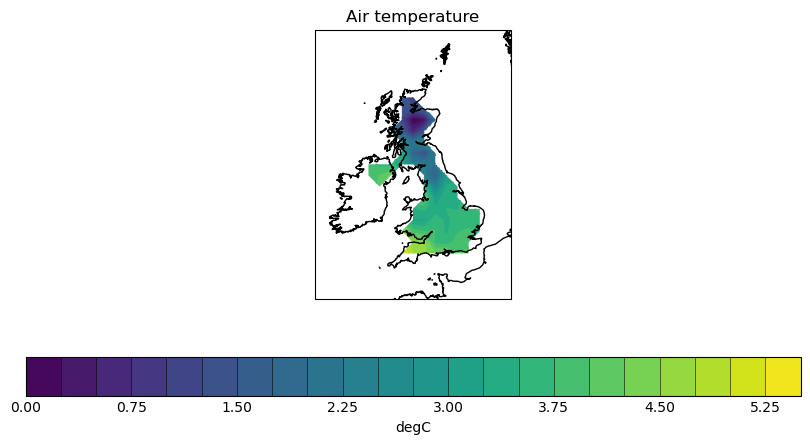

In [20]:
import iris.quickplot as qplt

fig = plt.figure(figsize=(10, 5))
qplt.contourf(obs_cube_rg[0, :, :], 25)
plt.gca().coastlines()

In [23]:
obs_cube_rg

<iris 'Cube' of air_temperature / (degC) (time: 12; projection_y_coordinate: 23; projection_x_coordinate: 17)>

AttributeError: 'Axes' object has no attribute 'coastlines'

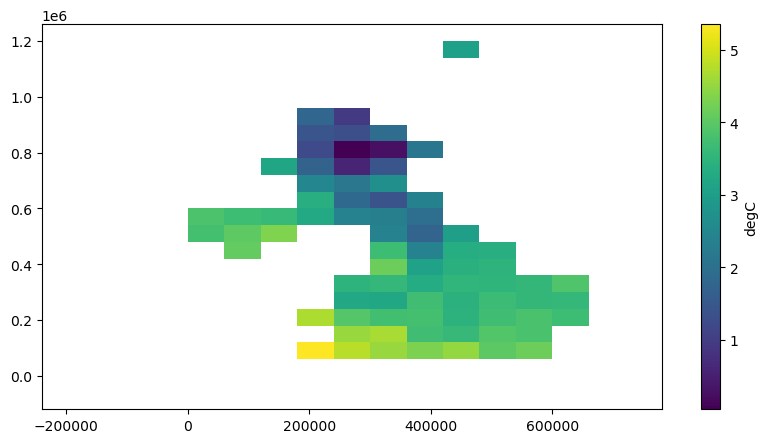

In [24]:
import matplotlib.pyplot as plt
import iris
import iris.plot as iplt

# Assuming 'cube' is an Iris cube
data = obs_cube_rg[0, :, :].data
lons = obs_cube_rg.coord('projection_x_coordinate').points
lats = obs_cube_rg.coord('projection_y_coordinate').points

fig = plt.figure(figsize=(10, 5))
plt.pcolormesh(lons, lats, data, shading='auto')
plt.colorbar(label=obs_cube_rg.units)
plt.gca().coastlines()
plt.show()

In [35]:
# print(obs_cube.coord(axis="X").coord_system)

print(obs_cube.coords(axis="X")[1].coord_system)

None


In [34]:
obs_cube.coords(axis="X")[1].coord_system = None

In [38]:
print(obs_cube.coords(axis="X")[1].coord_system)

None


In [39]:
print(model_cube.coord(axis="X").coord_system)

None


In [42]:
print(obs_cube.coords(axis="Y")[1].coord_system)

None


In [43]:
print(model_cube.coord(axis="Y").coord_system)

None


In [61]:
print(obs_cube.coords(axis="X")[1])

AuxCoord :  longitude / (degrees)
    points: [
        [-10.01291046,  -9.99967914, ...,   2.00501067,   2.01839366],
        [-10.01429114, -10.0010576 , ...,   2.00570756,   2.01909287],
        ...,
        [-13.00597103, -12.98800738, ...,   3.52515634,   3.54356439],
        [-13.00901764, -12.99104927, ...,   3.52671438,   3.54512755]]
    shape: (1450, 900)
    dtype: float64
    standard_name: 'longitude'
    long_name: 'Longitude'
    var_name: 'lon'


In [49]:
# change the var name
obs_cube.coords(axis="X")[1].var_name = "lon"

In [52]:
# set the long name
obs_cube.coords(axis="X")[1].long_name = "Longitude"

In [60]:
print(obs_cube.coords(axis="Y")[1])

AuxCoord :  latitude / (degrees)
    points: [
        [47.82437686, 47.82530568, ..., 48.0349378 , 48.03446974],
        [47.83328709, 47.83421619, ..., 48.04391368, 48.04344547],
        ...,
        [60.66652742, 60.66802068, ..., 61.00613976, 61.00538235],
        [60.67534134, 60.67683513, ..., 61.01507673, 61.01431905]]
    shape: (1450, 900)
    dtype: float64
    standard_name: 'latitude'
    long_name: 'Latitude'
    var_name: 'lat'


In [56]:
# change the var name
obs_cube.coords(axis="Y")[1].var_name = "lat"
obs_cube.coords(axis="Y")[1].long_name = "Latitude"

In [66]:
print(model_cube.coord(axis="X").coord_system)
print(model_cube.coord(axis="Y").coord_system)

print(obs_cube.coords(axis="X")[0].coord_system)
print(obs_cube.coords(axis="Y")[0].coord_system)

TransverseMercator(latitude_of_projection_origin=49.0, longitude_of_central_meridian=-2.0, false_easting=400000.0, false_northing=-100000.0, scale_factor_at_central_meridian=0.9996012717, ellipsoid=GeogCS(semi_major_axis=6377563.396, semi_minor_axis=6356256.909))
TransverseMercator(latitude_of_projection_origin=49.0, longitude_of_central_meridian=-2.0, false_easting=400000.0, false_northing=-100000.0, scale_factor_at_central_meridian=0.9996012717, ellipsoid=GeogCS(semi_major_axis=6377563.396, semi_minor_axis=6356256.909))
TransverseMercator(latitude_of_projection_origin=49.0, longitude_of_central_meridian=-2.0, false_easting=400000.0, false_northing=-100000.0, scale_factor_at_central_meridian=0.9996012717, ellipsoid=GeogCS(semi_major_axis=6377563.396, semi_minor_axis=6356256.909))
TransverseMercator(latitude_of_projection_origin=49.0, longitude_of_central_meridian=-2.0, false_easting=400000.0, false_northing=-100000.0, scale_factor_at_central_meridian=0.9996012717, ellipsoid=GeogCS(sem

In [65]:
model_cube.coord(axis="X").coord_system = obs_cube.coords(axis="X")[0].coord_system
model_cube.coord(axis="Y").coord_system = obs_cube.coords(axis="Y")[0].coord_system

In [69]:
print(obs_cube.coords(axis="X")[0])

DimCoord :  projection_x_coordinate / (m)
    points: [-199500., -198500., ...,  698500.,  699500.]
    bounds: [
        [-200000., -199000.],
        [-199000., -198000.],
        ...,
        [ 698000.,  699000.],
        [ 699000.,  700000.]]
    shape: (900,)  bounds(900, 2)
    dtype: float64
    standard_name: 'projection_x_coordinate'
    var_name: 'projection_x_coordinate'
    coord_system: TransverseMercator(latitude_of_projection_origin=49.0, longitude_of_central_meridian=-2.0, false_easting=400000.0, false_northing=-100000.0, scale_factor_at_central_meridian=0.9996012717, ellipsoid=GeogCS(semi_major_axis=6377563.396, semi_minor_axis=6356256.909))


In [67]:
# try regridding
obs_cube_rg = obs_cube.regrid(
    model_cube, iris.analysis.Linear()
)

ValueError: Unsupported units for coordinate system. Expected 'metres' got Unit('degrees_east').

In [32]:
print(obs_cube.coords(axis="X")[1].var_name)

longitude


In [33]:
obs_cube.coords(axis="X")[1].var_name = "projection_x_coordinate"

In [28]:
# add long_name to the x and y coords
obs_cube.coord(axis="X").long_name = "longitude"

CoordinateNotFoundError: 'Expected to find exactly 1 coordinate, but found 2. They were: projection_x_coordinate, longitude.'

In [23]:
print(obs_cube.coords(axis="Y")[1].coord_system)

None


In [25]:
print(obs_cube.coords(axis="Y")[1])

AuxCoord :  latitude / (degrees)
    points: [
        [47.82437686, 47.82530568, ..., 48.0349378 , 48.03446974],
        [47.83328709, 47.83421619, ..., 48.04391368, 48.04344547],
        ...,
        [60.66652742, 60.66802068, ..., 61.00613976, 61.00538235],
        [60.67534134, 60.67683513, ..., 61.01507673, 61.01431905]]
    shape: (1450, 900)
    dtype: float64
    standard_name: 'latitude'
    var_name: 'latitude'
